# CS5950/CS4950 Course Project

This project recaps and systematises work that has been done in the exercise notebooks: if you have worked through the notebooks, little extra work is required.  The aim of the project is to give you the experience of trying to develop a neural network classifier (or regressor), involving setting up a model, optimising the amount of regularisation, investigating its performance, and devising a new model. 

You should do your work in this notebook, filling in the sections below. To do the work, you may re-use code from ***any of the lab-session sheets provided so far***. (In fact, you should be able to do nearly the entire project using code taken from previous lab sessions.) 

Please complete this workbook and submit it on Moodle, with all outputs (numbers and graphs) visible and included. 

The deadline for this assignment is **Wednesday April 7th, 10am**

This project has **10%** of the marks of the course.

Please write your student number **100967464**:     
so that I have an identifier of which worksheet I am marking, to prevent any confusion! (I have to download your notebooks before marking them, so I don't want to accidentally give credit for your notebook to somebody else...) 

## Set up dataset

You may choose any of the datasets included with Pytorch, or used in the course so far (including, for example, the percolation data). (It is a free country and you may use any other data you wish.)

A safe choice would be either the MNIST data or the MNIST-fashion data, which is a drop-in replacement for MNIST (same size data format, same number of classes, same number of training and test examples). 

A more interesting choice would be CIFAR-10

In setting up the data, you should set up a training set and a test set. The test set should be large enough to give a reasonably accurate assessment of the error-rate (or loss) of your models: preferably at least 10,000 examples.

For the learning curve experiment (below), you will need to construct training sets of different sizes, with the largest at least 10 times the smallest. For the MNIST data, for example, your smallest training set might be 500, with sizes 500, 1000, 2000, 4000, 8000, 16000, 32000, and perhaps 60000 if you have time. (You get no extra marks for doing very long experiments.) 

## Set up model 

Set up a Pytorch model (you may find it helpful to keep it simple and fast to train). Train on an intermediate-sized dataset (if you are using MNIST, say 2000 or 4000). 


Plot the loss and error rate as a function of training epochs. 


###  1.  Assessment of initial model:    ***12 marks***

Ensure that your model is complex enough to *overfit* the training data: that is the loss/error-rate on the training set should be below your target loss/error-rate, and the loss/error-rate on the validation set should be higher than this (preferably higher than your target error-rate). 

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F  # this includes tensor functions that we can use in backwards pass
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint
import torch.optim as optim #importing various dependancies

transform = transforms.Compose([transforms.Resize((8, 8)),transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
training_set = datasets.MNIST('data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(training_set, batch_size=64)
test_set = datasets.MNIST('data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64)

def accuracy_and_loss( net, loss_function, dataloader ): #function that returns the accuracy and mean loss of a given system
    total_correct = 0 
    total_loss = 0.0 
    total_examples = 0 
    n_batches = 0 
    with torch.no_grad():
        for data in dataloader: 
            images, labels = data
            outputs = net(images)
            batch_loss = loss_function(outputs, labels) # average over batch
            n_batches += 1
            total_loss += batch_loss.item()
            _, outputs = torch.max(outputs, dim = 1)
            total_correct += sum( (outputs > 0.5 ) == ( labels > 0.5 ) ) # number correct in  minibatch
            total_examples += labels.size(0) # the number of labels
             
    
    accuracy = total_correct / total_examples
    mean_loss = total_loss / n_batches
    
    return ( accuracy, mean_loss )

transform_list = transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean=[0.0], std=[1.0,]) ] ) #transforms list to tensor
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_list)
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_list) #establishes sets
trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=32, shuffle=True, pin_memory=True)
testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=32, shuffle=True, pin_memory=True)

mnist_trainset_small =  [ mnist_trainset[i] for i in range(0,4000) ] #use this for smaller training sizes, training size of 4000 chosen
loss_function = nn.CrossEntropyLoss() 

class NN1( nn.Module ):
    
    def __init__(self): 
        super(NN1, self).__init__()
        self.layers = nn.Sequential( 
            nn.Flatten(), 
            nn.Linear(784,10),
            nn.LogSoftmax(dim=1))  #a simple netowrk with softmax regularisation
    
    
    def forward( self, x ): 
        x = self.layers( x ) #and a simple forward pass
        return x
    
net = NN1()
nn1 = NN1()
tmpiter = iter(trainloader)
images, labels = tmpiter.next()
loss_function = nn.CrossEntropyLoss()      #choose loss function
tmpiter = iter(trainloader)
images, labels = tmpiter.next()

train_acc1 = []
valacc1 = []
train_loss1 = []
valloss1 = []
net = NN1()

optimizer1 = optim.RMSprop( net.parameters(), lr=0.001 ) #chosen optimiser
for epoch in range(200): # number of times to loop over the dataset
        total_loss = 0 
        total_correct = 0 
        total_examples = 0 
        n_mini_batches = 0
        
        for i, mini_batch in enumerate( trainloader, 0 ):
            images, labels = mini_batch
            optimizer1.zero_grad() #zeros the gradient paramters by zeroing all gradients of tensors in the optimiser      
            outputs = net(images) #forward pass
            loss = loss_function ( outputs, labels)
            loss.backward() # does the backward pass and computes all gradients
            optimizer1.step() # does one optimisation step
            n_mini_batches += 1 # keep track of number of minibatches, and collect the loss for each minibatch
            total_loss += loss.item() 
            _, outputs = torch.max(outputs, dim = 1) #used to change dimesions of output for compatibility
            total_correct += sum(( outputs > 0.5 )==( labels > 0.5 ))
            total_examples += len( labels )
        epoch_training_accuracy = total_correct / total_examples
        epoch_training_loss = total_loss / n_mini_batches
    
        val_accuracy, val_loss = accuracy_and_loss( net, loss_function, testloader )
        train_loss1.append( epoch_training_loss )
        train_acc1.append( epoch_training_accuracy )
        valloss1.append( val_loss )
        valacc1.append( val_accuracy )#updates list at the end of each traiing epoch

        print('Epoch %d loss: %.3f acc: %.3f val_loss: %.3f val_acc: %.3f'
              %(epoch+1, epoch_training_loss, epoch_training_accuracy, val_loss, val_accuracy   ))#prints for clarity
    



Epoch 1 loss: 0.836 acc: 0.979 val_loss: 0.581 val_acc: 0.989
Epoch 2 loss: 0.486 acc: 0.988 val_loss: 0.473 val_acc: 0.989
Epoch 3 loss: 0.402 acc: 0.992 val_loss: 0.431 val_acc: 0.991
Epoch 4 loss: 0.356 acc: 0.993 val_loss: 0.396 val_acc: 0.991
Epoch 5 loss: 0.324 acc: 0.993 val_loss: 0.376 val_acc: 0.992
Epoch 6 loss: 0.302 acc: 0.993 val_loss: 0.361 val_acc: 0.991
Epoch 7 loss: 0.283 acc: 0.995 val_loss: 0.352 val_acc: 0.992
Epoch 8 loss: 0.268 acc: 0.994 val_loss: 0.348 val_acc: 0.992
Epoch 9 loss: 0.256 acc: 0.994 val_loss: 0.341 val_acc: 0.992
Epoch 10 loss: 0.245 acc: 0.995 val_loss: 0.336 val_acc: 0.992
Epoch 11 loss: 0.235 acc: 0.995 val_loss: 0.335 val_acc: 0.992
Epoch 12 loss: 0.226 acc: 0.996 val_loss: 0.335 val_acc: 0.991
Epoch 13 loss: 0.219 acc: 0.996 val_loss: 0.331 val_acc: 0.992
Epoch 14 loss: 0.212 acc: 0.997 val_loss: 0.330 val_acc: 0.992
Epoch 15 loss: 0.206 acc: 0.997 val_loss: 0.330 val_acc: 0.992
Epoch 16 loss: 0.200 acc: 0.998 val_loss: 0.329 val_acc: 0.992
E

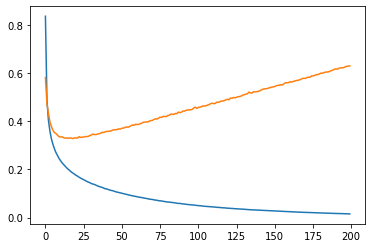

In [3]:
plt.plot( train_loss1, label='train_loss')
plt.plot( valloss1, label='val_loss')

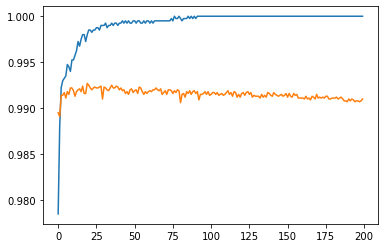

In [4]:
plt.plot( train_acc1, label='train_acc')
plt.plot( valacc1, label='val_acc')

shown above is the results for the traiing of the initial model, shown in blue is the results from the training set, whilst orange is the validation set. As we can see, the model experiences overfitting on the traiing data, and an accuracy on the validation set of above 90%, which for a model as simple as this fairly good.

### 2.  Regularisation experiment:  ***12 marks***

Now select a type of regularisation (which may be L2, or dropout) and train your initial model with different amounts of regularisation. 

A small amount of regularisation may improve the validation set performance of your overfitted model; too much regularisation may make performance on the validation set worse. 

Train your model multiple times, applying different amounts of regularisation, and plot a graoph showing the effect of different amounts of regularisation. 

Plot the amount of regularisation along the x axis, and the validation set performance (loss/error-rate) on the y axis.  How does regularisation affect the performance of your initial network, and what is the optimal amount? 

In [8]:
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_list)
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_list)

trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=32, shuffle=True)
train_acc2 = []
valacc2 = []
train_loss2 = []
valloss2 = []
net = NN1()
rng = [1, 0.5, 0.1, 0.05, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]#differnet values to use for value_decay, a form of regularisation built in to pytorch
for k in range(len(rng)):
    optimizer1 = optim.RMSprop( net.parameters(), lr=0.001, weight_decay=rng[k]  )#changes value decay values for each sets of traiing epochs
    for epoch in range(200):
        total_loss = 0 
        total_correct = 0 
        total_examples = 0 
        n_mini_batches = 0
        for i, mini_batch in enumerate( trainloader, 0 ):
            images, labels = mini_batch
            optimizer1.zero_grad()
            outputs = net(images) # this is the forward pass
            loss = loss_function ( outputs, labels)
            loss.backward() 
            optimizer1.step()
            n_mini_batches += 1
            total_loss += loss.item()
            _, outputs = torch.max(outputs, dim = 1)
            total_correct += sum(( outputs > 0.5 )==( labels > 0.5 ))
            total_examples += len( labels )
        epoch_training_accuracy = total_correct / total_examples
        epoch_training_loss = total_loss / n_mini_batches
    
        val_accuracy, val_loss = accuracy_and_loss( net, loss_function, testloader )
    train_loss2.append( epoch_training_loss )
    train_acc2.append( epoch_training_accuracy )
    valloss2.append( val_loss )
    valacc2.append( val_accuracy )#list updating taken outside inner loop
    print('Weight_Decay %d loss: %.3f accuracy: %.3f' %(k, val_loss, val_accuracy))#print for clarity


Weight_Decay 0 loss: 1.620 accuracy: 0.975
Weight_Decay 1 loss: 1.332 accuracy: 0.980
Weight_Decay 2 loss: 0.767 accuracy: 0.981
Weight_Decay 3 loss: 0.612 accuracy: 0.987
Weight_Decay 4 loss: 0.348 accuracy: 0.991
Weight_Decay 5 loss: 0.364 accuracy: 0.991
Weight_Decay 6 loss: 0.448 accuracy: 0.990
Weight_Decay 7 loss: 0.511 accuracy: 0.989
Weight_Decay 8 loss: 0.653 accuracy: 0.989


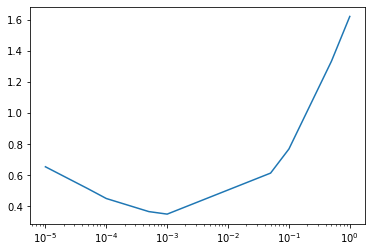

In [10]:
plt.plot(rng,valloss2)
plt.xscale("log")

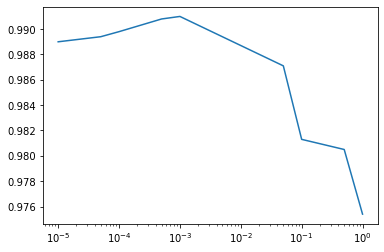

In [11]:
plt.plot(rng,valacc2)
plt.xscale("log")

pytorch optimisers can add regularisation in the form of 'weight_decay' during the parameter establishment for the optimiser. for the regularisation experiment, this was chosen to be the variable tested, with the values to be tested stored in the 'rng' list. the code iterates through the list, assigns the optimiser with the paramter, then trains the network over 200 epochs, then cycles paramter values. shown above are the graphs produced by the data obtained, which shows that as the value of weight decay approaches 1, there is a sharp decline in model performance. Model performance reaches its apex at around a value of 0.001 for this model.

### 3.  Learning curve experiment:  ***12 marks***

Now train your model (with the amount of regularisation you selected) on different amounts of training data. 

Plot the performance (loss/error-rate) of the model on the validation set against the size of the training set. 
This is typically best done on a log-log plot. 

Describe the approximate relationship between the training set size and loss / error-rate.  Does the network performance appear to improve as some power of the amount of data in the training set?  If so, by what power ? 

For example, a very good rate of improvement is for error-rate to be proportional to $\dfrac{1}{\sqrt{n}}$ where $n$ is the training set size.  For your model, the rate of improvement of validation error with training set size may not be as fast as this (or it may, who knows?)  The aim of this exercise is to find out what it actually is. 

In [12]:
size = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]#training set sizes to use

In [13]:
train_acc3=[] ##similar structure to previous question, just iterate through training sizes instead
valacc3 = []
train_loss3 = []
valloss3 = []
net = NN1()
optimizer1 = optim.RMSprop( net.parameters(), lr=0.001, weight_decay=0.001)
size = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
for k in range(len(size)):
    mnist_trainset_small =  [ mnist_trainset[d] for d in range(0,(size[k]))] #used this for smaller training sizes
    trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=32, shuffle=True)
    for epoch in range(200): # number of times to loop over the dataset
        total_loss = 0 
        total_correct = 0 
        total_examples = 0 
        n_mini_batches = 0
        
        for i, mini_batch in enumerate( trainloader, 0 ):
            images, labels = mini_batch
            optimizer1.zero_grad()
            outputs = net(images)
            loss = loss_function ( outputs, labels)
            loss.backward()
            optimizer1.step()
            n_mini_batches += 1 
            total_loss += loss.item()
            _, outputs = torch.max(outputs, dim = 1)
            total_correct += sum(( outputs > 0.5 )==( labels > 0.5 ))
            total_examples += len( labels )
        epoch_training_accuracy = total_correct / total_examples
        epoch_training_loss = total_loss / n_mini_batches
        val_accuracy, val_loss = accuracy_and_loss( net, loss_function, testloader )
    train_loss3.append( epoch_training_loss )
    train_acc3.append( epoch_training_accuracy )
    valloss3.append( val_loss )
    valacc3.append( val_accuracy )

       
    print('Weight_Decay %d loss: %.3f accuracy: %.3f' %(k, val_loss, val_accuracy))



Weight_Decay 0 loss: 1.093 accuracy: 0.972
Weight_Decay 1 loss: 0.565 accuracy: 0.985
Weight_Decay 2 loss: 0.478 accuracy: 0.990
Weight_Decay 3 loss: 0.412 accuracy: 0.990
Weight_Decay 4 loss: 0.338 accuracy: 0.990
Weight_Decay 5 loss: 0.312 accuracy: 0.992
Weight_Decay 6 loss: 0.293 accuracy: 0.993
Weight_Decay 7 loss: 0.290 accuracy: 0.993


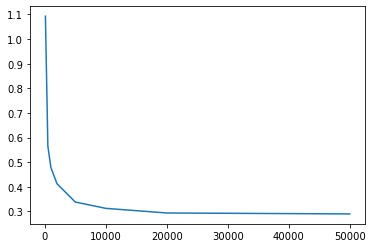

In [13]:
plt.plot(size,valloss3)

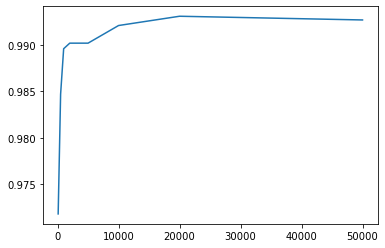

In [14]:
plt.plot(size, valacc3)

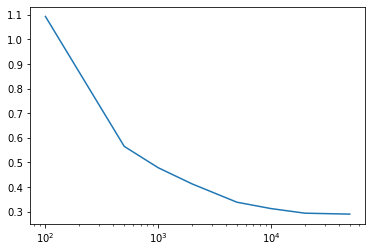

In [15]:
plt.plot(size,valloss3)
plt.xscale("log")

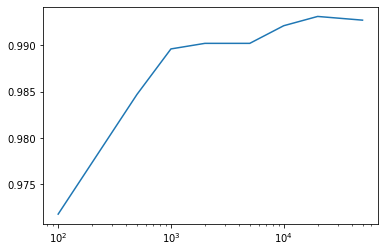

In [16]:
plt.plot(size, valacc3)
plt.xscale("log")

similar to the structure of the last experiment, the training set size experiment cycles through training set sizes instead of optimiser parameters. shown above are the graphs produced by the data obtained. we can see that, as expected, the larger the training set is, the higher degree of performance we can expect from the model. However, on more complicated models, the size of the training set will effect the time taken to resolve the system and so a balance of training size vs model performace should be established. In this models case, an ideal training size lies somewhere between 10000 and 20000. anything less results in poor performance, whilst any higher experiences diminishing results, and can be argued is not worth the increased times the model will experience.

### 4. Second model:   *** 14 marks ***

Devise what you believe to be a better neural network architecture for the problem (e.g. for MNIST you might use a fully-connected network for your initial model, and then try a convolutional net for your second model).

Repeat sections 2 (regularisation experiment), and determine whether it has better validation set performance than the first model, for an intermediate size of training set (e.g. 2000 or 4000 for the MNIST data). 

Repeat section 3. Does your model have a different learning curve from the first? Plot the learning curves for the first and second model on the same graph, to compare them. Comment: is there a more rapid reduction of error-rate with training set size for your second model?  

In [17]:
class NN1( nn.Module):
    def __init__(self):
        super(NN1, self).__init__()
        self.layers = nn.Sequential(nn.Flatten(), #second model of network
                                    nn.Linear(784,128), #similar structure, with more layers 
                                    nn.ReLU(),
                                    nn.Dropout(),#included dropout layer for overfit reduction
                                    nn.Linear(128,64), #second linear layer
                                    nn.LogSoftmax(dim=1)) #softmax
    def forward( self, x):
        x = self.layers(x) 
        return x

In [19]:
net = NN1() #code reused from question 1
nn1 = NN1()
tmpiter = iter(trainloader)
images, labels = tmpiter.next()
loss_function = nn.CrossEntropyLoss()      
tmpiter = iter(trainloader)
images, labels = tmpiter.next()
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_list)
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_list)

trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=32, shuffle=True, pin_memory=True)
testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=32, shuffle=True, pin_memory=True)
train_acc4 = []
valacc4 = []
train_loss4 = []
valloss4 = []
net = NN1()

optimizer1 = optim.RMSprop( net.parameters(), lr=0.001 )
for epoch in range(200):
        total_loss = 0 
        total_correct = 0 
        total_examples = 0 
        n_mini_batches = 0
        for i, mini_batch in enumerate( trainloader, 0 ):
            images, labels = mini_batch
            optimizer1.zero_grad()
            outputs = net(images)
            loss = loss_function ( outputs, labels)
            loss.backward()
            optimizer1.step()
            n_mini_batches += 1 
            total_loss += loss.item()
            _, outputs = torch.max(outputs, dim = 1)
            total_correct += sum(( outputs > 0.5 )==( labels > 0.5 ))
            total_examples += len( labels )
        epoch_training_accuracy = total_correct / total_examples
        epoch_training_loss = total_loss / n_mini_batches
        val_accuracy, val_loss = accuracy_and_loss( net, loss_function, testloader )
        train_loss4.append( epoch_training_loss )
        train_acc4.append( epoch_training_accuracy )
        valloss4.append( val_loss )
        valacc4.append( val_accuracy)
        print('Epoch %d loss: %.3f acc: %.3f val_loss: %.3f val_acc: %.3f'
              %(epoch+1, epoch_training_loss, epoch_training_accuracy, val_loss, val_accuracy   ))
    



Epoch 1 loss: 0.442 acc: 0.986 val_loss: 0.290 val_acc: 0.991
Epoch 2 loss: 0.267 acc: 0.991 val_loss: 0.238 val_acc: 0.993
Epoch 3 loss: 0.222 acc: 0.993 val_loss: 0.208 val_acc: 0.994
Epoch 4 loss: 0.199 acc: 0.994 val_loss: 0.204 val_acc: 0.993
Epoch 5 loss: 0.182 acc: 0.994 val_loss: 0.199 val_acc: 0.993
Epoch 6 loss: 0.174 acc: 0.994 val_loss: 0.198 val_acc: 0.994
Epoch 7 loss: 0.167 acc: 0.994 val_loss: 0.193 val_acc: 0.994
Epoch 8 loss: 0.158 acc: 0.995 val_loss: 0.190 val_acc: 0.995
Epoch 9 loss: 0.153 acc: 0.995 val_loss: 0.178 val_acc: 0.995
Epoch 10 loss: 0.151 acc: 0.995 val_loss: 0.188 val_acc: 0.995
Epoch 11 loss: 0.144 acc: 0.995 val_loss: 0.188 val_acc: 0.994
Epoch 12 loss: 0.138 acc: 0.996 val_loss: 0.190 val_acc: 0.995
Epoch 13 loss: 0.140 acc: 0.995 val_loss: 0.184 val_acc: 0.994
Epoch 14 loss: 0.135 acc: 0.996 val_loss: 0.184 val_acc: 0.995
Epoch 15 loss: 0.136 acc: 0.995 val_loss: 0.183 val_acc: 0.995
Epoch 16 loss: 0.128 acc: 0.995 val_loss: 0.193 val_acc: 0.995
E

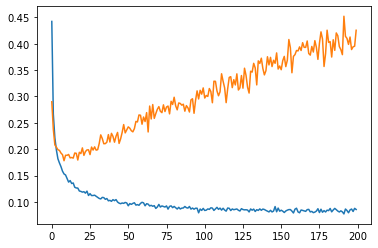

In [18]:
plt.plot( train_loss4, label='train_loss')
plt.plot( valloss4,label='val_loss')

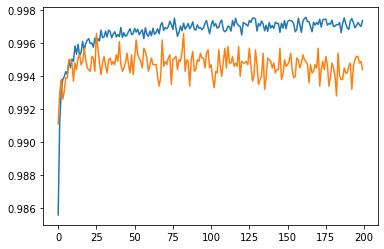

In [19]:
plt.plot( train_acc4, label='train_acc')
plt.plot( valacc4, label='val_acc')

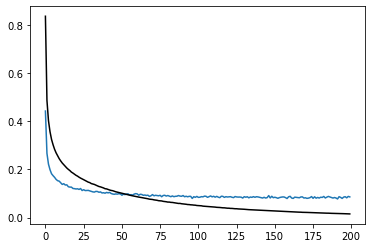

In [20]:
plt.plot(train_loss4, label="2nd model")
plt.plot(train_loss1,'k', label="1st model")

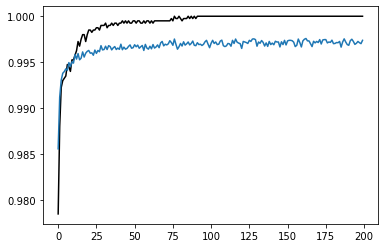

In [21]:
plt.plot(train_acc1,'k', label="1st model")
plt.plot(train_acc4, label="2nd model")

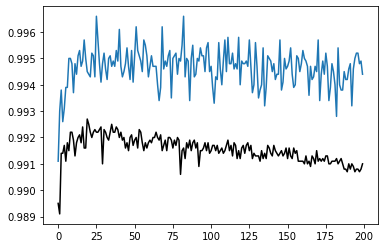

In [22]:
plt.plot(valacc1,'k', label="1st model")
plt.plot(valacc4, label="2nd model")

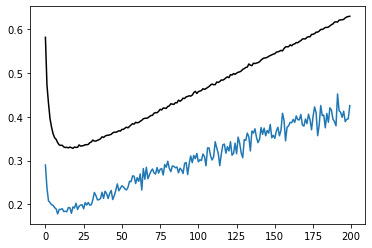

In [23]:
plt.plot(valloss4, label="2nd model")
plt.plot(valloss1,'k', label="1st model")

shown above are the graphs comparing the performance between model 1 and 2. As expected, the second model performs better than the previous, experiencing less validation loss, as well as higher validation accuracy and a reduced amount of overfitting on the training set. in fact, the only detriment the second model has over the first is the slightly higher loss on the training set during training.

In [ ]:
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform_list)
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_list)
trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader( mnist_testset, batch_size=32, shuffle=True)
train_acc5 = []
valacc5 = []
train_loss5 = []
valloss5 = []
net = NN1()
rng = [1, 0.5, 0.1, 0.05, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
for k in range(len(rng)):
    optimizer1 = optim.RMSprop( net.parameters(), lr=0.001, weight_decay=rng[k]  )
    for epoch in range(200):
        total_loss = 0 
        total_correct = 0 
        total_examples = 0 
        n_mini_batches = 0
        for i, mini_batch in enumerate( trainloader, 0 ):
            images, labels = mini_batch
            optimizer1.zero_grad()
            outputs = net(images)
            loss = loss_function ( outputs, labels)
            loss.backward()
            optimizer1.step()
            n_mini_batches += 1 
            total_loss += loss.item()
            _, outputs = torch.max(outputs, dim = 1)
            total_correct += sum(( outputs > 0.5 )==( labels > 0.5 ))
            total_examples += len( labels )
        epoch_training_accuracy = total_correct / total_examples
        epoch_training_loss = total_loss / n_mini_batches
        val_accuracy, val_loss = accuracy_and_loss( net, loss_function, testloader )
    train_loss5.append( epoch_training_loss )
    train_acc5.append( epoch_training_accuracy )
    valloss5.append( val_loss )
    valacc5.append( val_accuracy )

       
    print('Weight_Decay %d loss: %.3f accuracy: %.3f' %(k, val_loss, val_accuracy))


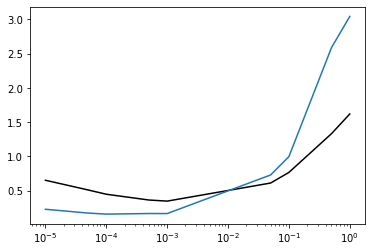

In [26]:
plt.plot(rng,valloss2,'k')
plt.plot(rng,valloss5)
plt.xscale("log")

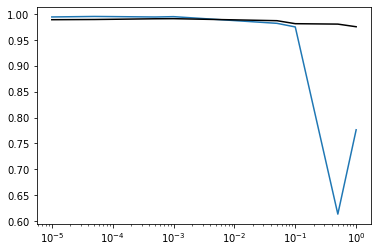

In [27]:
plt.plot(rng,valacc5)
plt.plot(rng,valacc2,'k')
plt.xscale("log")

similar to the previous model, the second model experiences drastic changes with the different values plugged into the optimiser. however, unlike the previous model, the accuracy is effected worse with the increase in weight decay. shown above in the graphs, with the blue plot representing the second model, we can see that the second model is effected much greater by the increase in weight decay, both in terms of loss and accuracy. the value of weight decay that best suits this model is 0.0001

In [29]:
train_acc6=[]
valacc6 = []
train_loss6 = []
valloss6 = []
net = NN1()
optimizer1 = optim.RMSprop( net.parameters(), lr=0.001, weight_decay=0.0001)
size = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
for k in range(len(size)):
    mnist_trainset_small =  [ mnist_trainset[d] for d in range(0,(size[k]))] #used this for smaller training sizes
    trainloader = torch.utils.data.DataLoader( mnist_trainset_small, batch_size=32, shuffle=True)
    for epoch in range(200):
        total_loss = 0 
        total_correct = 0 
        total_examples = 0 
        n_mini_batches = 0
        for i, mini_batch in enumerate( trainloader, 0 ):
            images, labels = mini_batch
            optimizer1.zero_grad()
            outputs = net(images)
            loss = loss_function ( outputs, labels)
            loss.backward()
            optimizer1.step()
            n_mini_batches += 1 
            total_loss += loss.item()
            _, outputs = torch.max(outputs, dim = 1)
            total_correct += sum(( outputs > 0.5 )==( labels > 0.5 ))
            total_examples += len( labels )
        epoch_training_accuracy = total_correct / total_examples
        epoch_training_loss = total_loss / n_mini_batches
        val_accuracy, val_loss = accuracy_and_loss( net, loss_function, testloader )
    train_loss6.append( epoch_training_loss )
    train_acc6.append( epoch_training_accuracy )
    valloss6.append( val_loss )
    valacc6.append( val_accuracy )

       
    print('Weight_Decay %d loss: %.3f accuracy: %.3f' %(k, val_loss, val_accuracy))



Weight_Decay 0 loss: 1.793 accuracy: 0.956
Weight_Decay 1 loss: 1.040 accuracy: 0.979
Weight_Decay 2 loss: 0.745 accuracy: 0.987
Weight_Decay 3 loss: 0.537 accuracy: 0.988
Weight_Decay 4 loss: 0.362 accuracy: 0.990
Weight_Decay 5 loss: 0.284 accuracy: 0.994
Weight_Decay 6 loss: 0.217 accuracy: 0.994
Weight_Decay 7 loss: 0.166 accuracy: 0.995


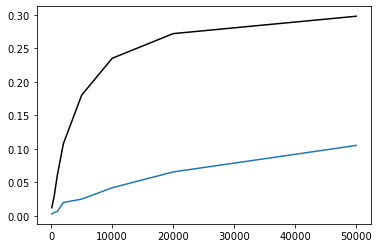

In [30]:
plt.plot(size,train_loss6)
plt.plot(size,train_loss3,'k')

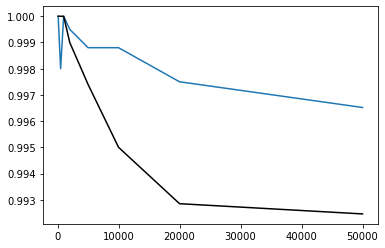

In [31]:
plt.plot(size,train_acc6)
plt.plot(size,train_acc3,'k')

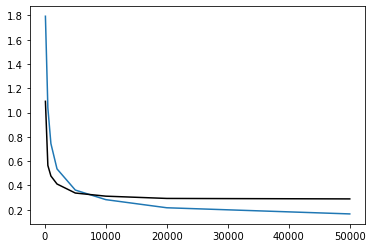

In [32]:
plt.plot(size,valloss6)
plt.plot(size,valloss3,'k')

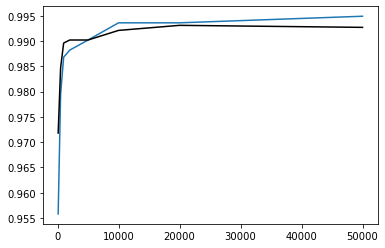

In [33]:
plt.plot(size,valacc6)
plt.plot(size,valacc3,'k')

as expected, the second model performs better than the first with increased training sizes. shown above in the graphs, we can see the previous model (black) produces a higher validation loss and a lower validation accuracy compared to the second. But similar to the previous model, the size of the training set directly effects the performance of the model. It is interesting to note that the second model perfomrs worse than the first at lower training sizes, this is most liekly due to the droupout layer, that would hinder classificastion at lower training sizes. The first model experiences a more rapid plateau in both validation loss and accuracy, but much lower loss and higher accuracy in the training sets as the training set size increases

In [ ]:
%store train_loss1
%store train_acc1
%store valloss1
%store valacc1
%store train_loss2
%store train_acc2
%store valloss2
%store valacc2
%store train_loss3
%store train_acc3
%store valloss3
%store valacc3
%store train_loss4
%store train_acc4
%store valloss4
%store valacc4
%store train_loss5
%store train_acc5
%store valloss5
%store valacc5

In [ ]:
%store -r train_loss1
%store -r train_acc1
%store -r valloss1
%store -r valacc1
%store -r train_loss2
%store -r train_acc2
%store -r valloss2
%store -r valacc2
%store -r train_loss3
%store -r train_acc3
%store -r valloss3
%store -r valacc3
%store -r train_loss4
%store -r train_acc4
%store -r valloss4
%store -r valacc4
%store -r train_loss5
%store -r train_acc5
%store -r valloss5
%store -r valacc5